In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
#importing dataset from csv file

transport= pd.read_csv("Nov09JnyExport.csv")
transport

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct
0,3,Tue,LUL,Unstarted,Kings Cross M,0,00:00,633,10:33,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day
1,4,Wed,LUL,Unstarted,Sudbury Hill,0,00:00,447,07:27,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
2,3,Tue,NR,Unstarted,Richmond,0,00:00,966,16:06,Z0304,TKT,N,0,0,XX,LUL Travelcard-7 Day
3,4,Wed,NR,Unstarted,Romford,0,00:00,657,10:57,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
4,6,Fri,NR,Unstarted,Norwood Junction SR,0,00:00,450,07:30,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623482,7,Sat,TRAM,GEORGE STRT TRAM,Wimbledon,999,16:39,1025,17:05,-------,PPY,N,0,0,XX,PAYG
2623483,3,Tue,LUL,Wood Lane,Baker Street,999,16:39,1019,16:59,Z0102,TKT,N,0,0,XX,LUL Travelcard-1 Month
2623484,6,Fri,LUL,Tottenham Court Rd,Oval,999,16:39,1016,16:56,-------,PPY,N,220,220,XX,PAYG
2623485,7,Sat,LTB,Bus,Bus,999,16:39,0,00:00,Z0203,TKT,N,0,0,262,LUL Travelcard-7 Day


In [3]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623487 entries, 0 to 2623486
Data columns (total 16 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   downo         int64 
 1   daytype       object
 2   SubSystem     object
 3   StartStn      object
 4   EndStation    object
 5   EntTime       int64 
 6   EntTimeHHMM   object
 7   ExTime        int64 
 8   EXTimeHHMM    object
 9   ZVPPT         object
 10  JNYTYP        object
 11  DailyCapping  object
 12  FFare         int64 
 13  DFare         int64 
 14  RouteID       object
 15  FinalProduct  object
dtypes: int64(5), object(11)
memory usage: 320.2+ MB


In [4]:
# drop unnecessary columns

transport.drop(["downo","ZVPPT","JNYTYP","DailyCapping","FFare","DFare","FinalProduct"],axis=1, inplace=True)
print(transport.head(10))

  daytype SubSystem   StartStn           EndStation  EntTime EntTimeHHMM  \
0     Tue       LUL  Unstarted        Kings Cross M        0       00:00   
1     Wed       LUL  Unstarted         Sudbury Hill        0       00:00   
2     Tue        NR  Unstarted             Richmond        0       00:00   
3     Wed        NR  Unstarted              Romford        0       00:00   
4     Fri        NR  Unstarted  Norwood Junction SR        0       00:00   
5     Fri       LUL  Unstarted       Clapham Common        0       00:00   
6     Thu        NR  Unstarted  Norwood Junction SR        0       00:00   
7     Thu        NR  Unstarted              Norbury        0       00:00   
8     Thu       LUL  Unstarted       Clapham Common        0       00:00   
9     Mon       LUL  Unstarted        Kings Cross M        0       00:00   

   ExTime EXTimeHHMM RouteID  
0     633      10:33      XX  
1     447      07:27      XX  
2     966      16:06      XX  
3     657      10:57      XX  
4     45

In [5]:
# rename columns to make it more clear

transport = transport.rename(columns={ 'daytype': 'DayType', 'EndStation': 'EndStn',
                        'EXTimeHHMM': 'ExTimeHHMM',})

In [6]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623487 entries, 0 to 2623486
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   DayType      object
 1   SubSystem    object
 2   StartStn     object
 3   EndStn       object
 4   EntTime      int64 
 5   EntTimeHHMM  object
 6   ExTime       int64 
 7   ExTimeHHMM   object
 8   RouteID      object
dtypes: int64(2), object(7)
memory usage: 180.1+ MB


In [7]:
# remove unstarted and unended rides in order to focus on whole journeys

unstarted = transport[ transport['StartStn'] == "Unstarted" ].index 
unended = transport[ transport['EndStn'] == "Unended" ].index 
#route = transport[ transport['RouteID'] == "XX" ].index 

In [8]:
# dropping rides with no start and end

transport.drop(unstarted, inplace = True) 
transport.drop(unended, inplace = True) 
#transport.drop(route, inplace = True) 
transport

,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,RouteID
45989,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,XX
45990,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,242
45991,Thu,LTB,Bus,Bus,1000,16:40,0,00:00,16
45992,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,254
45993,Sat,LTB,Bus,Bus,1000,16:40,0,00:00,474
...,...,...,...,...,...,...,...,...,...
2623482,Sat,TRAM,GEORGE STRT TRAM,Wimbledon,999,16:39,1025,17:05,XX
2623483,Tue,LUL,Wood Lane,Baker Street,999,16:39,1019,16:59,XX
2623484,Fri,LUL,Tottenham Court Rd,Oval,999,16:39,1016,16:56,XX
2623485,Sat,LTB,Bus,Bus,999,16:39,0,00:00,262


In [9]:
# explore dataset

print(sorted(transport['RouteID'].unique()))

['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '143D', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '15H', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', 

In [10]:
transport['RouteID'].value_counts()

XX     809413
86      12066
25      11170
36      10606
254     10526
        ...  
632         1
LBN         1
665         1
969         1
689         1
Name: RouteID, Length: 745, dtype: int64

In [11]:
print(sorted(transport['SubSystem'].unique()))

['DLR', 'DLR/LRC', 'HEX', 'LRC', 'LTB', 'LUL', 'LUL/DLR', 'LUL/LRC', 'LUL/NR', 'LUL/NR/DLR', 'LUL/NR/LRC', 'LUL/TRAM', 'NR', 'NR/DLR', 'NR/LRC', 'TRAM']


In [12]:
transport['SubSystem'].value_counts()

LTB           1768080
LUL            702843
NR              25789
LUL/NR          24851
LUL/DLR         13911
TRAM             9583
DLR              9008
LUL/NR/LRC       8012
NR/LRC           5991
LRC              3369
LUL/LRC          3087
LUL/NR/DLR       1865
HEX               751
NR/DLR            263
LUL/TRAM           86
DLR/LRC             4
Name: SubSystem, dtype: int64

In [13]:
transport.reset_index(inplace = True)

In [14]:
print(transport.shape)
transport.head(40)

(2577493, 10)


,index,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,RouteID
0,45989,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,XX
1,45990,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,242
2,45991,Thu,LTB,Bus,Bus,1000,16:40,0,00:00,16
3,45992,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,254
4,45993,Sat,LTB,Bus,Bus,1000,16:40,0,00:00,474
5,45994,Thu,LUL,Preston Road,Northwood,1000,16:40,1024,17:04,XX
6,45995,Sat,NR,Ilford,Unfinished,1000,16:40,0,00:00,XX
7,45996,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,92
8,45997,Sat,LTB,Bus,Bus,1000,16:40,0,00:00,120
9,45998,Thu,LUL,Holborn,Bounds Green,1000,16:40,1028,17:08,XX


In [15]:
# Add column and calculate journey length

transport['JourneyLength'] = transport['ExTime'] - transport['EntTime']
transport

,index,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,RouteID,JourneyLength
0,45989,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,XX,41
1,45990,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,242,-1000
2,45991,Thu,LTB,Bus,Bus,1000,16:40,0,00:00,16,-1000
3,45992,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,254,-1000
4,45993,Sat,LTB,Bus,Bus,1000,16:40,0,00:00,474,-1000
...,...,...,...,...,...,...,...,...,...,...,...
2577488,2623482,Sat,TRAM,GEORGE STRT TRAM,Wimbledon,999,16:39,1025,17:05,XX,26
2577489,2623483,Tue,LUL,Wood Lane,Baker Street,999,16:39,1019,16:59,XX,20
2577490,2623484,Fri,LUL,Tottenham Court Rd,Oval,999,16:39,1016,16:56,XX,17
2577491,2623485,Sat,LTB,Bus,Bus,999,16:39,0,00:00,262,-999


In [16]:
#seperating data with subsystem=bus

bus = transport[transport['SubSystem'] == 'LTB']
bus


,index,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,RouteID,JourneyLength
1,45990,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,242,-1000
2,45991,Thu,LTB,Bus,Bus,1000,16:40,0,00:00,16,-1000
3,45992,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,254,-1000
4,45993,Sat,LTB,Bus,Bus,1000,16:40,0,00:00,474,-1000
7,45996,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,92,-1000
...,...,...,...,...,...,...,...,...,...,...,...
2577484,2623478,Sat,LTB,Bus,Bus,999,16:39,0,00:00,120,-999
2577485,2623479,Thu,LTB,Bus,Bus,999,16:39,0,00:00,177,-999
2577486,2623480,Sat,LTB,Bus,Bus,999,16:39,0,00:00,235,-999
2577491,2623485,Sat,LTB,Bus,Bus,999,16:39,0,00:00,262,-999


In [17]:
# Journey length could not be calculated for the bus, because the end station is missing

bus.drop(['JourneyLength','StartStn','EndStn'],axis=1,inplace=True)
bus.head()

C:\Users\sandr\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,DayType,SubSystem,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,RouteID
1,45990,Fri,LTB,1000,16:40,0,00:00,242
2,45991,Thu,LTB,1000,16:40,0,00:00,16
3,45992,Fri,LTB,1000,16:40,0,00:00,254
4,45993,Sat,LTB,1000,16:40,0,00:00,474
7,45996,Fri,LTB,1000,16:40,0,00:00,92


In [18]:
bus.reset_index(inplace = True)
bus.drop('index',axis=1,inplace=True)
bus.drop('level_0',axis=1,inplace=True)
bus.to_csv('bus.csv')

C:\Users\sandr\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
bus

,DayType,SubSystem,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,RouteID
0,Fri,LTB,1000,16:40,0,00:00,242
1,Thu,LTB,1000,16:40,0,00:00,16
2,Fri,LTB,1000,16:40,0,00:00,254
3,Sat,LTB,1000,16:40,0,00:00,474
4,Fri,LTB,1000,16:40,0,00:00,92
...,...,...,...,...,...,...,...
1768075,Sat,LTB,999,16:39,0,00:00,120
1768076,Thu,LTB,999,16:39,0,00:00,177
1768077,Sat,LTB,999,16:39,0,00:00,235
1768078,Sat,LTB,999,16:39,0,00:00,262


In [20]:
#seperating data with subsystem='LUL'(train)
train = transport[transport['SubSystem'] == 'LUL']
train.drop('RouteID',axis=1,inplace=True)
train.head()

C:\Users\sandr\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength
0,45989,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,41
5,45994,Thu,LUL,Preston Road,Northwood,1000,16:40,1024,17:04,24
9,45998,Thu,LUL,Holborn,Bounds Green,1000,16:40,1028,17:08,28
14,46003,Sun,LUL,Earls Court,Pimlico,1000,16:40,1021,17:01,21
16,46005,Tue,LUL,Victoria,Bethnal Green,1000,16:40,1027,17:07,27


In [21]:
#loading london stations dataset 
stations = pd.read_csv("London stations.csv")
stations

,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
0,Abbey Road,539081,183352,51.531952,0.003723,3,E15 3NB
1,Abbey Wood,547297,179002,51.490784,0.120272,4,SE2 9RH
2,Acton Central,520613,180299,51.508758,-0.263430,2,W3 6BH
3,Acton Main Line,520296,181196,51.516887,-0.267690,3,W3 9EH
4,Acton Town,519457,179639,51.503071,-0.280303,3,W3 8HN
...,...,...,...,...,...,...,...
647,Woodside Park,525725,192564,51.617868,-0.185426,4,N12 8SE
648,Woolwich,543931,178994,51.491578,0.071819,4,NaN
649,Woolwich Arsenal,543754,178803,51.489907,0.069194,4,SE18 6HX
650,Woolwich Dockyard,542738,178908,51.491108,0.054612,3,SE18 5JY


In [22]:
# remove unnecessary columns
stations.drop(['OS X','OS Y','Zone','Postcode'],axis=1,inplace=True)
stations.head()

,Station,Latitude,Longitude
0,Abbey Road,51.531952,0.003723
1,Abbey Wood,51.490784,0.120272
2,Acton Central,51.508758,-0.263430
3,Acton Main Line,51.516887,-0.267690
4,Acton Town,51.503071,-0.280303


In [23]:
#combining latitude and longitude values for start station
combined = pd.merge(train,stations,left_on='StartStn',right_on='Station')
combined

,index,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,Station,Latitude,Longitude
0,45989,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,41,Goodge Street,51.520613,-0.134808
1,46126,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,Goodge Street,51.520613,-0.134808
2,46532,Mon,LUL,Goodge Street,Camden Town,1000,16:40,1014,16:54,14,Goodge Street,51.520613,-0.134808
3,47138,Tue,LUL,Goodge Street,Golders Green,1000,16:40,1021,17:01,21,Goodge Street,51.520613,-0.134808
4,47304,Wed,LUL,Goodge Street,Balham,1000,16:40,1034,17:14,34,Goodge Street,51.520613,-0.134808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617116,2093369,Sun,LUL,Clapham Junction,Unfinished,819,13:39,0,00:00,-819,Clapham Junction,51.464367,-0.170315
617117,481623,Fri,LUL,Tower Gateway,Unfinished,1121,18:41,0,00:00,-1121,Tower Gateway,51.510393,-0.074410
617118,2006076,Fri,LUL,South Quay,Unfinished,783,13:03,0,00:00,-783,South Quay,51.500864,-0.018461
617119,2223731,Tue,LUL,Island Gardens,Unfinished,873,14:33,0,00:00,-873,Island Gardens,51.487950,-0.010493


In [24]:
#remove duplicated columns
combined.drop(['index','Station'],axis=1,inplace=True)


In [25]:
combined = combined.rename(columns={'Latitude': 'StartLat', 'Longitude': 'StartLong'})
combined

,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,StartLat,StartLong
0,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,41,51.520613,-0.134808
1,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,51.520613,-0.134808
2,Mon,LUL,Goodge Street,Camden Town,1000,16:40,1014,16:54,14,51.520613,-0.134808
3,Tue,LUL,Goodge Street,Golders Green,1000,16:40,1021,17:01,21,51.520613,-0.134808
4,Wed,LUL,Goodge Street,Balham,1000,16:40,1034,17:14,34,51.520613,-0.134808
...,...,...,...,...,...,...,...,...,...,...,...
617116,Sun,LUL,Clapham Junction,Unfinished,819,13:39,0,00:00,-819,51.464367,-0.170315
617117,Fri,LUL,Tower Gateway,Unfinished,1121,18:41,0,00:00,-1121,51.510393,-0.074410
617118,Fri,LUL,South Quay,Unfinished,783,13:03,0,00:00,-783,51.500864,-0.018461
617119,Tue,LUL,Island Gardens,Unfinished,873,14:33,0,00:00,-873,51.487950,-0.010493


In [26]:
#remove unstarted and unfinished
combined = combined[(combined['StartStn'] != 'Unstarted') & (combined['EndStn'] != 'Unfinished')]

In [27]:
#combining latitude and longitude values for end station
combined = pd.merge(combined,stations,left_on='EndStn',right_on='Station')
combined.head()

,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,StartLat,StartLong,Station,Latitude,Longitude
0,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,51.520613,-0.134808,Charing Cross,51.508359,-0.124803
1,Fri,LUL,Goodge Street,Charing Cross,1000,16:40,1011,16:51,11,51.520613,-0.134808,Charing Cross,51.508359,-0.124803
2,Wed,LUL,Goodge Street,Charing Cross,1004,16:44,1013,16:53,9,51.520613,-0.134808,Charing Cross,51.508359,-0.124803
3,Mon,LUL,Goodge Street,Charing Cross,1005,16:45,1013,16:53,8,51.520613,-0.134808,Charing Cross,51.508359,-0.124803
4,Thu,LUL,Goodge Street,Charing Cross,1006,16:46,1014,16:54,8,51.520613,-0.134808,Charing Cross,51.508359,-0.124803


In [28]:
combined.drop('Station',axis=1,inplace=True)
combined = combined.rename(columns={'Latitude': 'EndLat', 'Longitude': 'EndLong'})
combined              

,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,StartLat,StartLong,EndLat,EndLong
0,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,51.520613,-0.134808,51.508359,-0.124803
1,Fri,LUL,Goodge Street,Charing Cross,1000,16:40,1011,16:51,11,51.520613,-0.134808,51.508359,-0.124803
2,Wed,LUL,Goodge Street,Charing Cross,1004,16:44,1013,16:53,9,51.520613,-0.134808,51.508359,-0.124803
3,Mon,LUL,Goodge Street,Charing Cross,1005,16:45,1013,16:53,8,51.520613,-0.134808,51.508359,-0.124803
4,Thu,LUL,Goodge Street,Charing Cross,1006,16:46,1014,16:54,8,51.520613,-0.134808,51.508359,-0.124803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521651,Wed,LUL,Croxley,Croxley,1048,17:28,1048,17:28,0,51.647005,-0.441604,51.647005,-0.441604
521652,Sat,LUL,Croxley,Croxley,1105,18:25,1216,20:16,111,51.647005,-0.441604,51.647005,-0.441604
521653,Tue,LUL,Chorleywood,Croxley,1007,16:47,1034,17:14,27,51.654266,-0.518334,51.647005,-0.441604
521654,Wed,LUL,Chorleywood,Croxley,1113,18:33,1131,18:51,18,51.654266,-0.518334,51.647005,-0.441604


In [29]:
#exporting the combined dataset
combined.to_csv('combined_train.csv')

In [30]:
# loead weather data and rename
weather = pd.read_excel('weatherdata_30min.xlsx', parse_dates={'datetime':[0,1]})
weather.rename(columns={'Dew Point':'DewPoint'})
weather['Temperature'] = weather['Temperature'].str.replace('F','')
weather['Dew Point'] = weather['Dew Point'].str.replace('F','')
weather['Humidity'] = weather['Humidity'].str.replace('%','')
weather['Wind Speed'] = weather['Wind Speed'].str.replace('mph','')
weather['Wind Gust'] = weather['Wind Gust'].str.replace('mph','')
weather['Pressure'] = weather['Pressure'].str.replace('in','')
weather.drop(labels='Preciption', axis=1, inplace=True)
weather.head()

,datetime,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition
0,2009-11-01 00:20:00,55,52,88,SW,7,0,30.07,Mostly Cloudy
1,2009-11-01 00:50:00,54,52,94,WSW,3,0,30.07,Mostly Cloudy
2,2009-11-01 01:20:00,54,50,88,SSE,2,0,30.04,Fair
3,2009-11-01 01:50:00,52,50,94,CALM,0,0,30.01,Fair
4,2009-11-01 02:20:00,52,50,94,CALM,0,0,30.01,Fair


In [31]:
# Convert to float 
weather = weather.astype({'Humidity':'float64','Wind Speed':'float64','Wind Gust':'float64', 'Temperature':'float64', 'Dew Point':'float64', 'Pressure':'float64'})
weather.dtypes

datetime       datetime64[ns]
Temperature           float64
Dew Point             float64
Humidity              float64
Wind                   object
Wind Speed            float64
Wind Gust             float64
Pressure              float64
Condition              object
dtype: object

In [32]:
weather.rename(columns={'Temperature':'Temperature [F]', 'Dew Point':'DewPoint [F]'}, inplace=True)
weather.head()

,datetime,Temperature [F],DewPoint [F],Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition
0,2009-11-01 00:20:00,55.0,52.0,88.0,SW,7.0,0.0,30.07,Mostly Cloudy
1,2009-11-01 00:50:00,54.0,52.0,94.0,WSW,3.0,0.0,30.07,Mostly Cloudy
2,2009-11-01 01:20:00,54.0,50.0,88.0,SSE,2.0,0.0,30.04,Fair
3,2009-11-01 01:50:00,52.0,50.0,94.0,CALM,0.0,0.0,30.01,Fair
4,2009-11-01 02:20:00,52.0,50.0,94.0,CALM,0.0,0.0,30.01,Fair


In [33]:
# convert F to °C

weather['Temperature[°C]'] = round((weather['Temperature [F]']-32)*5/9, 2)
weather['DewPoint[°C]'] = round((weather['DewPoint [F]']-32)*5/9, 2)
weather.dtypes

datetime           datetime64[ns]
Temperature [F]           float64
DewPoint [F]              float64
Humidity                  float64
Wind                       object
Wind Speed                float64
Wind Gust                 float64
Pressure                  float64
Condition                  object
Temperature[°C]           float64
DewPoint[°C]              float64
dtype: object

In [34]:
#Set daytype to index
weather_h = weather.set_index('datetime').resample('h').mean()
weather_h.reset_index(inplace=True)
weather_h.head()

,datetime,Temperature [F],DewPoint [F],Humidity,Wind Speed,Wind Gust,Pressure,Temperature[°C],DewPoint[°C]
0,2009-11-01 00:00:00,54.5,52.0,91.0,5.0,0.0,30.070,12.500,11.11
1,2009-11-01 01:00:00,53.0,50.0,91.0,1.0,0.0,30.025,11.665,10.00
2,2009-11-01 02:00:00,52.0,50.0,94.0,1.5,0.0,29.995,11.110,10.00
3,2009-11-01 03:00:00,52.0,50.0,94.0,4.0,0.0,29.970,11.110,10.00
4,2009-11-01 04:00:00,52.0,50.0,94.0,4.5,0.0,29.915,11.110,10.00


In [35]:
#Load rainfall data 
rainfall = pd.read_excel('UK_hourly_rainfall_Nov09.xlsx', skiprows=3, header=None, names=['Date','Rainfall', 'end'], parse_dates=[1])
rainfall.drop(labels='end', axis=1, inplace=True)

In [36]:
#merge weather data 
weather_compl = weather_h.merge(rainfall, left_on='datetime', right_on='Date')
weather_compl.drop('Date', axis=1, inplace=True)
weather_compl.head()
# Humidity in %, WindSpeed/Gust in mph, Pressure in in, Rainfall in mm

,datetime,Temperature [F],DewPoint [F],Humidity,Wind Speed,Wind Gust,Pressure,Temperature[°C],DewPoint[°C],Rainfall
0,2009-11-01 00:00:00,54.5,52.0,91.0,5.0,0.0,30.070,12.500,11.11,0.0
1,2009-11-01 01:00:00,53.0,50.0,91.0,1.0,0.0,30.025,11.665,10.00,0.0
2,2009-11-01 02:00:00,52.0,50.0,94.0,1.5,0.0,29.995,11.110,10.00,0.0
3,2009-11-01 03:00:00,52.0,50.0,94.0,4.0,0.0,29.970,11.110,10.00,0.0
4,2009-11-01 04:00:00,52.0,50.0,94.0,4.5,0.0,29.915,11.110,10.00,0.0


In [37]:
weather_compl

,datetime,Temperature [F],DewPoint [F],Humidity,Wind Speed,Wind Gust,Pressure,Temperature[°C],DewPoint[°C],Rainfall
0,2009-11-01 00:00:00,54.5,52.0,91.0,5.0,0.0,30.070,12.500,11.110,0.0
1,2009-11-01 01:00:00,53.0,50.0,91.0,1.0,0.0,30.025,11.665,10.000,0.0
2,2009-11-01 02:00:00,52.0,50.0,94.0,1.5,0.0,29.995,11.110,10.000,0.0
3,2009-11-01 03:00:00,52.0,50.0,94.0,4.0,0.0,29.970,11.110,10.000,0.0
4,2009-11-01 04:00:00,52.0,50.0,94.0,4.5,0.0,29.915,11.110,10.000,0.0
...,...,...,...,...,...,...,...,...,...,...
177,2009-11-07 20:00:00,46.0,39.0,76.0,8.5,0.0,29.340,7.780,3.890,0.0
178,2009-11-07 21:00:00,45.5,39.0,78.5,7.5,0.0,29.340,7.500,3.890,0.0
179,2009-11-07 21:00:00,45.5,39.0,78.5,7.5,0.0,29.340,7.500,3.890,0.0
180,2009-11-07 22:00:00,45.5,40.0,81.0,6.5,0.0,29.340,7.500,4.445,0.0


In [38]:
# Prepare the weather_complete dataset according to the traindataset for merging
# Date_day gets a string and converts to datetime

import datetime
import calendar

day_abbr = ["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

def date_day(x): 
    day = datetime.datetime.strptime(str(x["datetime"]), '%Y-%m-%d %H:%M:%S')
    return day_abbr[day.weekday()]

weather_compl['DayType'] = weather_compl.apply(date_day, axis = 1) 

def date_HH(x): 
    day = datetime.datetime.strptime(str(x["datetime"]), '%Y-%m-%d %H:%M:%S')
    return day.strftime("%H")

weather_compl['HH'] = weather_compl.apply(date_HH, axis = 1)

In [39]:
transport["HH"] = transport["EntTimeHHMM"].str[0:2]
transport.head()


,index,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,RouteID,JourneyLength,HH
0,45989,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,XX,41,16
1,45990,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,242,-1000,16
2,45991,Thu,LTB,Bus,Bus,1000,16:40,0,00:00,16,-1000,16
3,45992,Fri,LTB,Bus,Bus,1000,16:40,0,00:00,254,-1000,16
4,45993,Sat,LTB,Bus,Bus,1000,16:40,0,00:00,474,-1000,16


In [40]:
#load combined dataset
train= pd.read_csv("combined_train.csv")
train

,Unnamed: 0,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,StartLat,StartLong,EndLat,EndLong
0,0,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,51.520613,-0.134808,51.508359,-0.124803
1,1,Fri,LUL,Goodge Street,Charing Cross,1000,16:40,1011,16:51,11,51.520613,-0.134808,51.508359,-0.124803
2,2,Wed,LUL,Goodge Street,Charing Cross,1004,16:44,1013,16:53,9,51.520613,-0.134808,51.508359,-0.124803
3,3,Mon,LUL,Goodge Street,Charing Cross,1005,16:45,1013,16:53,8,51.520613,-0.134808,51.508359,-0.124803
4,4,Thu,LUL,Goodge Street,Charing Cross,1006,16:46,1014,16:54,8,51.520613,-0.134808,51.508359,-0.124803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521651,521651,Wed,LUL,Croxley,Croxley,1048,17:28,1048,17:28,0,51.647005,-0.441604,51.647005,-0.441604
521652,521652,Sat,LUL,Croxley,Croxley,1105,18:25,1216,20:16,111,51.647005,-0.441604,51.647005,-0.441604
521653,521653,Tue,LUL,Chorleywood,Croxley,1007,16:47,1034,17:14,27,51.654266,-0.518334,51.647005,-0.441604
521654,521654,Wed,LUL,Chorleywood,Croxley,1113,18:33,1131,18:51,18,51.654266,-0.518334,51.647005,-0.441604


In [41]:
#remove minutes of HHMM for merging 
train["HH"] = train["EntTimeHHMM"].str[0:2]
train.head()

,Unnamed: 0,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,StartLat,StartLong,EndLat,EndLong,HH
0,0,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,51.520613,-0.134808,51.508359,-0.124803,16
1,1,Fri,LUL,Goodge Street,Charing Cross,1000,16:40,1011,16:51,11,51.520613,-0.134808,51.508359,-0.124803,16
2,2,Wed,LUL,Goodge Street,Charing Cross,1004,16:44,1013,16:53,9,51.520613,-0.134808,51.508359,-0.124803,16
3,3,Mon,LUL,Goodge Street,Charing Cross,1005,16:45,1013,16:53,8,51.520613,-0.134808,51.508359,-0.124803,16
4,4,Thu,LUL,Goodge Street,Charing Cross,1006,16:46,1014,16:54,8,51.520613,-0.134808,51.508359,-0.124803,16


In [42]:
weather_compl

,datetime,Temperature [F],DewPoint [F],Humidity,Wind Speed,Wind Gust,Pressure,Temperature[°C],DewPoint[°C],Rainfall,DayType,HH
0,2009-11-01 00:00:00,54.5,52.0,91.0,5.0,0.0,30.070,12.500,11.110,0.0,Sun,00
1,2009-11-01 01:00:00,53.0,50.0,91.0,1.0,0.0,30.025,11.665,10.000,0.0,Sun,01
2,2009-11-01 02:00:00,52.0,50.0,94.0,1.5,0.0,29.995,11.110,10.000,0.0,Sun,02
3,2009-11-01 03:00:00,52.0,50.0,94.0,4.0,0.0,29.970,11.110,10.000,0.0,Sun,03
4,2009-11-01 04:00:00,52.0,50.0,94.0,4.5,0.0,29.915,11.110,10.000,0.0,Sun,04
...,...,...,...,...,...,...,...,...,...,...,...,...
177,2009-11-07 20:00:00,46.0,39.0,76.0,8.5,0.0,29.340,7.780,3.890,0.0,Sat,20
178,2009-11-07 21:00:00,45.5,39.0,78.5,7.5,0.0,29.340,7.500,3.890,0.0,Sat,21
179,2009-11-07 21:00:00,45.5,39.0,78.5,7.5,0.0,29.340,7.500,3.890,0.0,Sat,21
180,2009-11-07 22:00:00,45.5,40.0,81.0,6.5,0.0,29.340,7.500,4.445,0.0,Sat,22


In [43]:
#drop unnecessary columns 
weather_compl.drop(["Temperature [F]","DewPoint [F]","Humidity","Wind Gust","Pressure"],axis=1, inplace=True)
weather_compl.head(10)

,datetime,Wind Speed,Temperature[°C],DewPoint[°C],Rainfall,DayType,HH
0,2009-11-01 00:00:00,5.0,12.500,11.110,0.0,Sun,00
1,2009-11-01 01:00:00,1.0,11.665,10.000,0.0,Sun,01
2,2009-11-01 02:00:00,1.5,11.110,10.000,0.0,Sun,02
3,2009-11-01 03:00:00,4.0,11.110,10.000,0.0,Sun,03
4,2009-11-01 04:00:00,4.5,11.110,10.000,0.0,Sun,04
5,2009-11-01 05:00:00,6.5,11.945,10.555,0.0,Sun,05
6,2009-11-01 06:00:00,13.0,12.780,11.110,0.0,Sun,06
7,2009-11-01 07:00:00,14.0,12.780,11.665,0.0,Sun,07
8,2009-11-01 08:00:00,14.0,14.445,12.500,0.2,Sun,08
9,2009-11-01 09:00:00,17.0,15.000,12.780,0.2,Sun,09


In [44]:
weather_compl = weather_compl.rename(columns={'Hour':'HH'})
weather_compl              

,datetime,Wind Speed,Temperature[°C],DewPoint[°C],Rainfall,DayType,HH
0,2009-11-01 00:00:00,5.0,12.500,11.110,0.0,Sun,00
1,2009-11-01 01:00:00,1.0,11.665,10.000,0.0,Sun,01
2,2009-11-01 02:00:00,1.5,11.110,10.000,0.0,Sun,02
3,2009-11-01 03:00:00,4.0,11.110,10.000,0.0,Sun,03
4,2009-11-01 04:00:00,4.5,11.110,10.000,0.0,Sun,04
...,...,...,...,...,...,...,...
177,2009-11-07 20:00:00,8.5,7.780,3.890,0.0,Sat,20
178,2009-11-07 21:00:00,7.5,7.500,3.890,0.0,Sat,21
179,2009-11-07 21:00:00,7.5,7.500,3.890,0.0,Sat,21
180,2009-11-07 22:00:00,6.5,7.500,4.445,0.0,Sat,22


In [45]:
## connect weather data with train data

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521656 entries, 0 to 521655
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     521656 non-null  int64  
 1   DayType        521656 non-null  object 
 2   SubSystem      521656 non-null  object 
 3   StartStn       521656 non-null  object 
 4   EndStn         521656 non-null  object 
 5   EntTime        521656 non-null  int64  
 6   EntTimeHHMM    521656 non-null  object 
 7   ExTime         521656 non-null  int64  
 8   ExTimeHHMM     521656 non-null  object 
 9   JourneyLength  521656 non-null  int64  
 10  StartLat       521656 non-null  float64
 11  StartLong      521656 non-null  float64
 12  EndLat         521656 non-null  float64
 13  EndLong        521656 non-null  float64
 14  HH             521656 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 59.7+ MB


In [47]:
weather_compl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         182 non-null    datetime64[ns]
 1   Wind Speed       178 non-null    float64       
 2   Temperature[°C]  178 non-null    float64       
 3   DewPoint[°C]     178 non-null    float64       
 4   Rainfall         182 non-null    float64       
 5   DayType          182 non-null    object        
 6   HH               182 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 11.4+ KB


In [48]:
combined["HH"] = combined["EntTimeHHMM"].str[0:2]
combined.head()

,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,StartLat,StartLong,EndLat,EndLong,HH
0,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,51.520613,-0.134808,51.508359,-0.124803,16
1,Fri,LUL,Goodge Street,Charing Cross,1000,16:40,1011,16:51,11,51.520613,-0.134808,51.508359,-0.124803,16
2,Wed,LUL,Goodge Street,Charing Cross,1004,16:44,1013,16:53,9,51.520613,-0.134808,51.508359,-0.124803,16
3,Mon,LUL,Goodge Street,Charing Cross,1005,16:45,1013,16:53,8,51.520613,-0.134808,51.508359,-0.124803,16
4,Thu,LUL,Goodge Street,Charing Cross,1006,16:46,1014,16:54,8,51.520613,-0.134808,51.508359,-0.124803,16


In [49]:
weather_compl.set_index('datetime')
weather_compl['DayType'].value_counts()

Sun    26
Mon    26
Tue    26
Fri    26
Sat    26
Thu    26
Wed    26
Name: DayType, dtype: int64

In [50]:
#using only first week of values from train dataset as we only have 1 week weather data
firstweek = combined#[:182]
firstweek

,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,StartLat,StartLong,EndLat,EndLong,HH
0,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,51.520613,-0.134808,51.508359,-0.124803,16
1,Fri,LUL,Goodge Street,Charing Cross,1000,16:40,1011,16:51,11,51.520613,-0.134808,51.508359,-0.124803,16
2,Wed,LUL,Goodge Street,Charing Cross,1004,16:44,1013,16:53,9,51.520613,-0.134808,51.508359,-0.124803,16
3,Mon,LUL,Goodge Street,Charing Cross,1005,16:45,1013,16:53,8,51.520613,-0.134808,51.508359,-0.124803,16
4,Thu,LUL,Goodge Street,Charing Cross,1006,16:46,1014,16:54,8,51.520613,-0.134808,51.508359,-0.124803,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521651,Wed,LUL,Croxley,Croxley,1048,17:28,1048,17:28,0,51.647005,-0.441604,51.647005,-0.441604,17
521652,Sat,LUL,Croxley,Croxley,1105,18:25,1216,20:16,111,51.647005,-0.441604,51.647005,-0.441604,18
521653,Tue,LUL,Chorleywood,Croxley,1007,16:47,1034,17:14,27,51.654266,-0.518334,51.647005,-0.441604,16
521654,Wed,LUL,Chorleywood,Croxley,1113,18:33,1131,18:51,18,51.654266,-0.518334,51.647005,-0.441604,18


In [51]:
# Merging weather and train data by HH and DayType
train_weather = pd.merge(firstweek,weather_compl,on=['HH','DayType'])
train_weather.head()

,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,StartLat,StartLong,EndLat,EndLong,HH,datetime,Wind Speed,Temperature[°C],DewPoint[°C],Rainfall
0,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,51.520613,-0.134808,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
1,Wed,LUL,Goodge Street,Charing Cross,1004,16:44,1013,16:53,9,51.520613,-0.134808,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
2,Wed,LUL,Holborn,Charing Cross,1001,16:41,1017,16:57,16,51.517236,-0.119841,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
3,Wed,LUL,Holborn,Charing Cross,1015,16:55,1033,17:13,18,51.517236,-0.119841,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
4,Wed,LUL,Golders Green,Charing Cross,1005,16:45,1038,17:18,33,51.572216,-0.194835,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2


In [52]:
train_weather['HH'].value_counts()

09    64646
08    58495
17    56735
18    49477
07    39620
16    37665
21    32632
19    29152
15    28324
14    23141
13    23028
12    22182
20    20003
10    19969
11    19463
06    15408
22    14204
23    10384
05     3490
04       21
Name: HH, dtype: int64

In [53]:
#train_weather.drop("DayType_y",axis=1, inplace=True)
train_weather.head(10)

,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,StartLat,StartLong,EndLat,EndLong,HH,datetime,Wind Speed,Temperature[°C],DewPoint[°C],Rainfall
0,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,51.520613,-0.134808,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
1,Wed,LUL,Goodge Street,Charing Cross,1004,16:44,1013,16:53,9,51.520613,-0.134808,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
2,Wed,LUL,Holborn,Charing Cross,1001,16:41,1017,16:57,16,51.517236,-0.119841,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
3,Wed,LUL,Holborn,Charing Cross,1015,16:55,1033,17:13,18,51.517236,-0.119841,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
4,Wed,LUL,Golders Green,Charing Cross,1005,16:45,1038,17:18,33,51.572216,-0.194835,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
5,Wed,LUL,Oxford Circus,Charing Cross,1002,16:42,1011,16:51,9,51.515223,-0.140836,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
6,Wed,LUL,Oxford Circus,Charing Cross,978,16:18,991,16:31,13,51.515223,-0.140836,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
7,Wed,LUL,Oxford Circus,Charing Cross,985,16:25,995,16:35,10,51.515223,-0.140836,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
8,Wed,LUL,Oxford Circus,Charing Cross,995,16:35,1007,16:47,12,51.515223,-0.140836,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2
9,Wed,LUL,Camden Town,Charing Cross,996,16:36,1011,16:51,15,51.539969,-0.142452,51.508359,-0.124803,16,2009-11-04 16:00:00,12.0,10.555,5.0,0.2


In [54]:
train_weather.set_index('datetime')

,DayType,SubSystem,StartStn,EndStn,EntTime,EntTimeHHMM,ExTime,ExTimeHHMM,JourneyLength,StartLat,StartLong,EndLat,EndLong,HH,Wind Speed,Temperature[°C],DewPoint[°C],Rainfall
datetime,,,,,,,,,,,,,,,,,,
2009-11-04 16:00:00,Wed,LUL,Goodge Street,Charing Cross,1000,16:40,1010,16:50,10,51.520613,-0.134808,51.508359,-0.124803,16,12.0,10.555,5.00,0.2
2009-11-04 16:00:00,Wed,LUL,Goodge Street,Charing Cross,1004,16:44,1013,16:53,9,51.520613,-0.134808,51.508359,-0.124803,16,12.0,10.555,5.00,0.2
2009-11-04 16:00:00,Wed,LUL,Holborn,Charing Cross,1001,16:41,1017,16:57,16,51.517236,-0.119841,51.508359,-0.124803,16,12.0,10.555,5.00,0.2
2009-11-04 16:00:00,Wed,LUL,Holborn,Charing Cross,1015,16:55,1033,17:13,18,51.517236,-0.119841,51.508359,-0.124803,16,12.0,10.555,5.00,0.2
2009-11-04 16:00:00,Wed,LUL,Golders Green,Charing Cross,1005,16:45,1038,17:18,33,51.572216,-0.194835,51.508359,-0.124803,16,12.0,10.555,5.00,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-11-06 04:00:00,Fri,LUL,Elm Park,West Brompton,299,04:59,365,06:05,66,51.549125,0.197253,51.487329,-0.195539,04,8.5,8.890,7.22,0.2
2009-11-06 04:00:00,Fri,LUL,Baker Street,Euston Square,298,04:58,302,05:02,4,51.523130,-0.156904,51.528664,-0.133296,04,8.5,8.890,7.22,0.2
2009-11-05 04:00:00,Thu,LUL,Hounslow Central,Hounslow Central,292,04:52,296,04:56,4,51.470926,-0.365958,51.470926,-0.365958,04,12.0,10.000,7.22,0.0


In [55]:
train_weather.to_csv('week1_train.csv')

In [56]:
train_weather.columns

Index(['DayType', 'SubSystem', 'StartStn', 'EndStn', 'EntTime', 'EntTimeHHMM',
       'ExTime', 'ExTimeHHMM', 'JourneyLength', 'StartLat', 'StartLong',
       'EndLat', 'EndLong', 'HH', 'datetime', 'Wind Speed', 'Temperature[°C]',
       'DewPoint[°C]', 'Rainfall'],
      dtype='object')

In [57]:
corr = train_weather.corr()

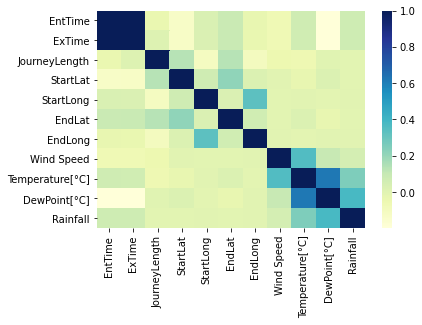

In [58]:
# Visualization 
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, cmap="YlGnBu")

C:\Users\sandr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


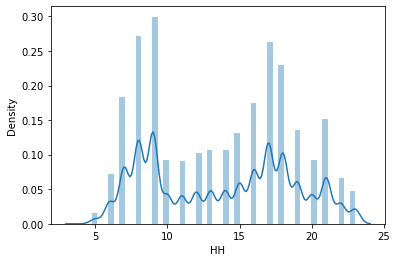

In [59]:
sns.distplot(train_weather['HH'])

In [60]:
#sns.distplot(train_weather['Rainfall'])

In [61]:
#plt.scatter(train_weather['DayType'], train_weather['Rainfall'])

In [62]:
correlation = train_weather[['DayType','HH','Wind Speed','Temperature[°C]','DewPoint[°C]','Rainfall','datetime']]
correlation.astype({'HH':'int'})
correlation.sort_values(by='HH', inplace=True)
#correlation.head()

<ipython-input-62-a3a4c2bcd1dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation.sort_values(by='HH', inplace=True)


In [63]:
correlation.corr()

,Wind Speed,Temperature[°C],DewPoint[°C],Rainfall
Wind Speed,1.000000,0.360371,0.097824,0.050491
Temperature[°C],0.360371,1.000000,0.621500,0.252921
DewPoint[°C],0.097824,0.621500,1.000000,0.384423
Rainfall,0.050491,0.252921,0.384423,1.000000


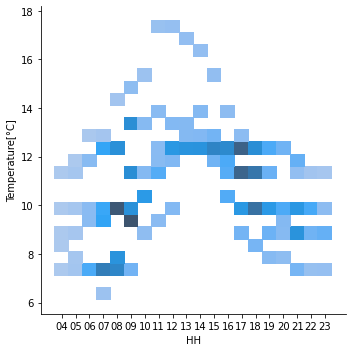

In [64]:
train_weather.sort_values(by='HH', inplace=True)
sns.displot(x=train_weather["HH"], y=train_weather["Temperature[°C]"],binwidth=(2, .5))

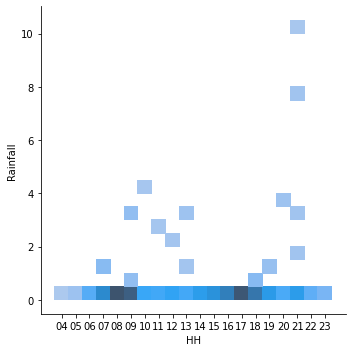

In [65]:
sns.displot(x=train_weather["HH"], y=train_weather["Rainfall"],binwidth=(2, .5))

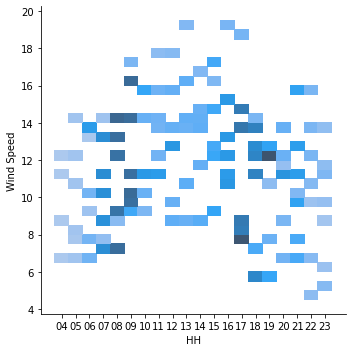

In [66]:
sns.displot(x=train_weather["HH"], y=train_weather['Wind Speed'],binwidth=(2, .5))

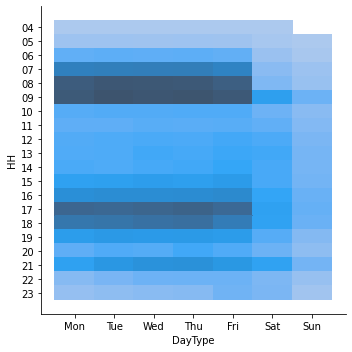

In [83]:
#Sort by Day

Day= ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=Day, ordered=True)
train_weather['DayType'] = train_weather['DayType'].astype(cat_type)

#train_weather.sort_values(by='DayType', inplace=True)
train_weather.sort_values(by='HH', inplace=True)
sns.displot(x=train_weather["DayType"], y=train_weather["HH"],binwidth=(2, .5))

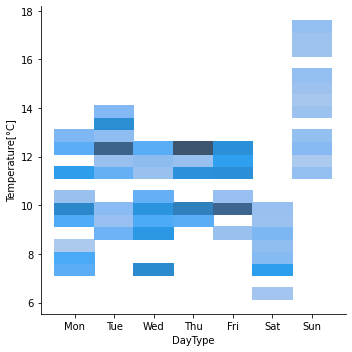

In [84]:
sns.displot(x=train_weather['DayType'], y=train_weather['Temperature[°C]'],binwidth=(2, .5))

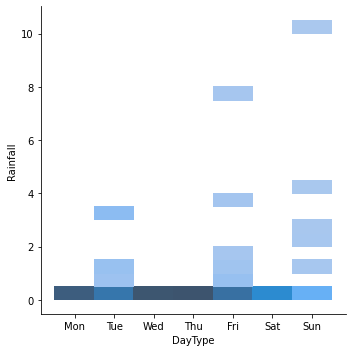

In [85]:
sns.displot(x=train_weather['DayType'], y=train_weather['Rainfall'],binwidth=(2, .5))

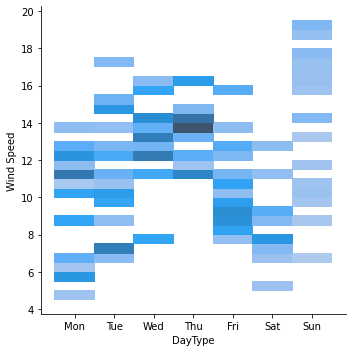

In [86]:
sns.displot(x=train_weather['DayType'], y=train_weather['Wind Speed'],binwidth=(2, .5))

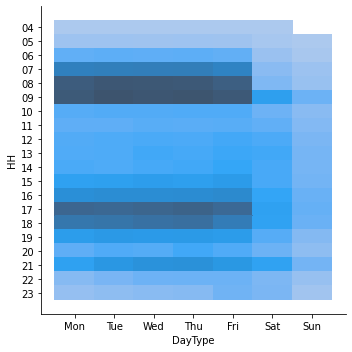

In [89]:
train_weather.sort_values(by='HH', inplace=True)
sns.displot(x=train_weather["DayType"], y=train_weather["HH"],binwidth=(2, .5))